# Lab 7: Monday, May 31

Reminders
  * Assignment 3 due Tuesday -- remember to name files correctly!
  * Test 2 on Wednesday on Avenue

Today's Lab Topics
  * `input()`
  * File I/O
  * NumPy
  * MatPlotLib

## Questions?

## 1. Integer Input

Write a function, which we'll use in the next question, which takes a single parameter, and asks for input using `input()`.
The parameter should be a string, which is then used as the parameter when you call `input()`.

The function should then cast the input to an integer (using `int()`) and return the integer, if the input is a nonnegative integer.
If the input is not a nonnegative integer, then you should print a descriptive error message and ask for input again. 
(Your function should return the first integer value it receives.)

Note: you can find a discussion regarding `isdigit()` vs `isdecimal()` vs `isnumeric()` [here](https://stackoverflow.com/a/54912545).

In [1]:
def get_int(prompt):
    int_input = input(prompt)
    
    while not int_input.isnumeric():
        print("Error: not a nonnegative integer, please try again.\n")
        int_input = input(prompt)
        
    return int(int_input)

In [2]:
# try it yourself...
print(get_int('Enter a nonnegative integer: '))

Enter a nonnegative integer: no
Error: not a nonnegative integer, please try again.

Enter a nonnegative integer: 11
11


## 2. Writing to file

Write a function `text_nums()` which does not take any parameters, then using `input()` gets the following input from the user:
1. `start`,
2. `stop`,
3. `step`,
4. `file_name`.

The first three should be integers, so you should use your previous function.
The fourth input should be a string, you may assume this input is valid.

The output of the function should be written to the file `file_name`. 
This output should be a list of numbers, each on a new line, starting at `start`, going up to _and including_ `stop`, with a step size `step`.

So, if the inputs are `start = 2`, `stop = 20`, `step = 3`, and `file_name = 'num_doc.txt'`, your function should open the text document `num_doc.txt` and write the following list:

```
2
5
8
11
14
17
20
```

In [3]:
def text_nums():
    start = get_int('Enter the start value: ')
    stop = get_int('Enter the stop value: ')
    step = get_int('Enter the step size: ')
    
    file_name = input('Enter the file name for output: ')
    
    with open(file_name, 'a') as f:
        for i in range(start, stop+1, step):
            f.write(str(i) + '\n')

Use the following inputs with your function, and check you get the output you expect:
1. `start = 2`, `stop = 20`, `step = 3`, `file_name = Assets/question2_output.txt`,
2. `start = 0`, `stop = 20`, `step = 1`, `file_name = Assets/linspace.txt`.

In [4]:
text_nums()

Enter the start value: 2
Enter the stop value: 20
Enter the step size: 3
Enter the file name for output: Assets/question2_output.txt


## 3. Reading a file

Now write a function `compute` which takes three parameters:
1. `x_file`,
2. `fct`,
3. `y_file`.

Now `x_file` should be a file as in question 2, consisting of the $x$-values we'll use to create a file of $y$-values, which we'll output in `y_file`.
For each $x$-value, the $y$-value should be computed with the function `fct`.

The output in `y_file` should be formatted the same as in the previous question.

In [5]:
def compute(x_file, fct, y_file):
    with open(x_file, 'r') as fx:
        x_values = [int(line.strip()) for line in fx.readlines()]
    
    y_values = [fct(x) for x in x_values]
    with open(y_file, 'w') as fy:
        for y in y_values:
            fy.write(str(y) + '\n')

In [6]:
compute('Assets/question2_output.txt', lambda x: x*x/10, 'Assets/question3_output.txt')

In [7]:
compute('Assets/linspace.txt', lambda x: x if x%2==0 else x-1, 'Assets/fct1.txt')

In [8]:
from math import sin
compute('Assets/linspace.txt', lambda x: sin(x), 'Assets/fct2.txt')

## 4. Putting it together & plotting

Write a function `create_plot` which takes as parameters `x_file` and `y_file`.
The function should create a plot using the $x$-values from `x_file` and $y$-values from `y_file`.

In [9]:
import matplotlib.pyplot as plt

def create_plot(x_file, y_file):
    with open(x_file, 'r') as fx:
        x_values = [float(line.strip()) for line in fx.readlines()]
        
    with open(y_file, 'r') as fy:
        y_values = [float(line.strip()) for line in fy.readlines()]
        
    plt.plot(x_values, y_values)

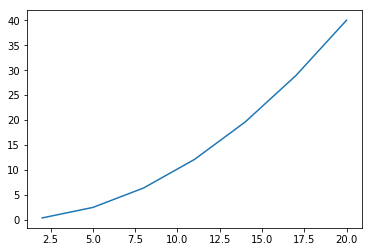

In [10]:
create_plot('Assets/question2_output.txt', 'Assets/question3_output.txt')

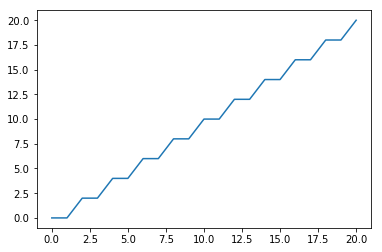

In [11]:
create_plot('Assets/linspace.txt', 'Assets/fct1.txt')

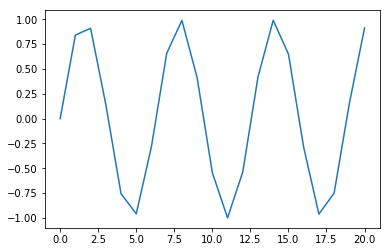

In [12]:
create_plot('Assets/linspace.txt', 'Assets/fct2.txt')

## 5. Improvements with NumPy

Now, the plots above aren't smooth. 
We can improve them using the `numpy` method `linspace()`.

Write a function `better_plot()` which takes the following parameters:
  * `start`
  * `stop`
  * `steps`
  * `fct`

Here, `steps` is the number of points in the interval from `start` to `stop`.
Further, `start` and `stop` may be any float now (not just nonnegative integers).
The last parameter `fct` is again some function.

Your function should plot the function `fct` on the interval (of $x$-values) from `start` up to (and including) `stop`, with step size `step`.

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def better_plot(start, stop, steps, fct):
    xs = np.linspace(start, stop, steps)
    ys = fct(xs)
    
    plt.plot(xs, ys)

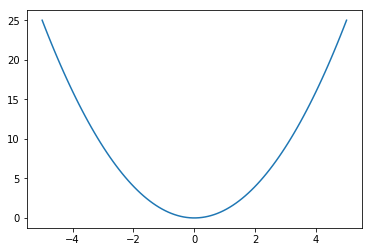

In [14]:
better_plot(-5, 5, 100, lambda x: x**2)

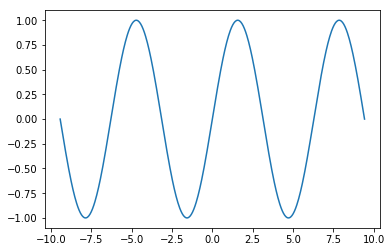

In [15]:
better_plot(-3*np.pi, 3*np.pi, 500, lambda x: np.sin(x))

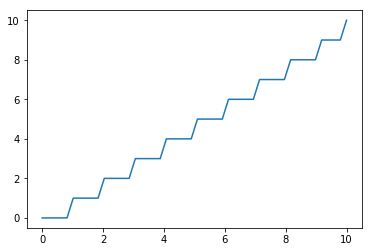

In [16]:
better_plot(0, 10, 50, lambda x: np.floor(x))

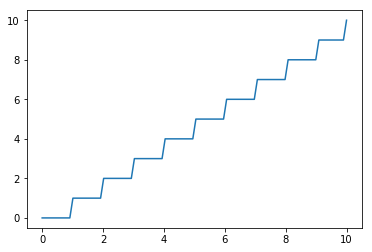

In [17]:
better_plot(0, 10, 100, lambda x: np.floor(x))

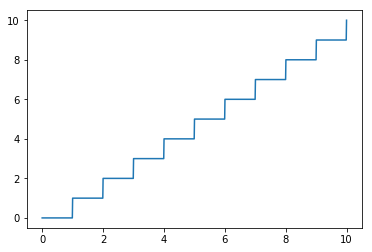

In [18]:
better_plot(0, 10, 1000, lambda x: np.floor(x))